In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import librosa
from transformers import WhisperProcessor, WhisperForConditionalGeneration
import torch

In [50]:
audio,sr = librosa.load("TestAudio1.m4a",sr = 16000)
audio

C:\Users\Reynaldi\AppData\Local\Temp\ipykernel_40868\1597059269.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  audio,sr = librosa.load("TestAudio1.m4a",sr = 16000)


array([0., 0., 0., ..., 0., 0., 0.], shape=(82262,), dtype=float32)

### 1. Exploratory Data Analysis

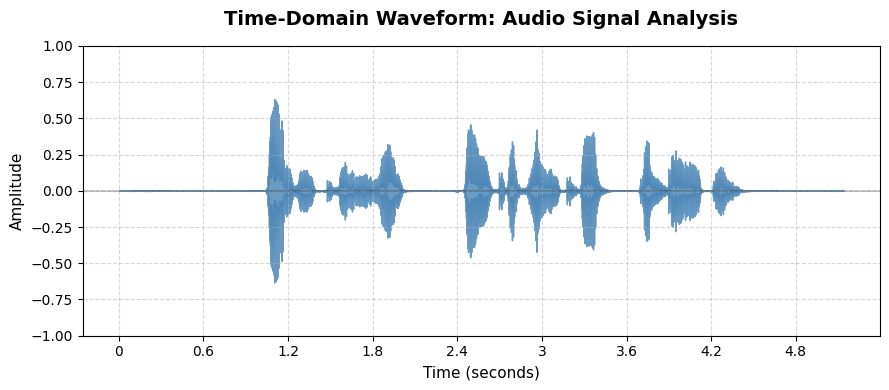

In [51]:
plt.figure(figsize=(9, 4))

librosa.display.waveshow(audio, sr=sr, color='steelblue', alpha=0.8)

plt.axhline(0, color='black', linestyle='-', alpha=0.2)

plt.title("Time-Domain Waveform: Audio Signal Analysis", fontsize=14, weight='bold', pad=15)
plt.xlabel("Time (seconds)", fontsize=11)
plt.ylabel("Amplitude", fontsize=11)

plt.ylim(-1, 1)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

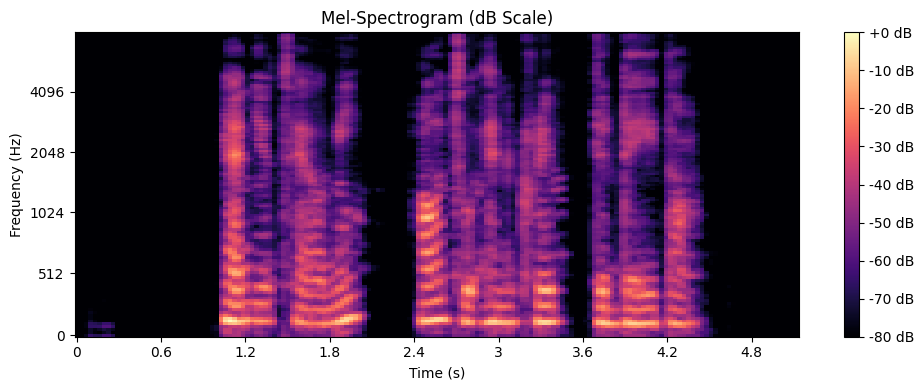

In [52]:
# Improvement: Menggunakan parameter n_mels yang lebih tinggi untuk detail frekuensi
spectrum = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000)
db_spectrum = librosa.power_to_db(spectrum, ref=np.max)

plt.figure(figsize=(10, 4)) # Ukuran sedikit lebih besar agar label terbaca

# Improvement: Menambahkan x_axis='time' dan y_axis='mel' agar sumbu informatif
img = librosa.display.specshow(db_spectrum, 
                               sr=sr, 
                               x_axis='time', 
                               y_axis='mel', 
                               fmax=8000, 
                               cmap='magma') 

plt.colorbar(img, format='%+2.0f dB') # Menambahkan bar skala intensitas suara
plt.title("Mel-Spectrogram (dB Scale)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()

### 2. Load Model

In [29]:
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-large-v3")
processor = WhisperProcessor.from_pretrained("openai/whisper-large-v3")

config.json: 0.00B [00:00, ?B/s]

d:\Conda\envs\last_project\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Reynaldi\.cache\huggingface\hub\models--openai--whisper-large-v3. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP downl

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

Error while downloading from https://huggingface.co/openai/whisper-large-v3/resolve/main/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: dd109ad9-a0dc-432a-aa65-66651906856f)')' thrown while requesting GET https://huggingface.co/openai/whisper-large-v3/resolve/main/model.safetensors
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: c51eb49b-be75-4e41-a171-d946cdffa92d)')' thrown while requesting GET https://huggingface.co/openai/whisper-large-v3/resolve/main/model.safetensors
Retrying in 2s [Retry 2/5].


model.safetensors:  39%|###8      | 1.20G/3.09G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

In [ ]:
hasil_processor = processor.feature_extractor(audio, sampling_rate = sr, return_tensors = "pt")
with torch.no_grad() : 
    hasil_model = model.generate(**hasil_processor)
sentence = processor.tokenizer.batch_decode(hasil_model, skip_special_tokens = True)[0]
sentence = sentence.strip()
sentence

'Can you tell me how to encrypt the data?'

In [54]:
model.save_pretrained("audio_model")
processor.save_pretrained("audio_processor")

d:\Conda\envs\last_project\lib\site-packages\transformers\modeling_utils.py:3918: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


[]